### installing package to load dataset & validate smile string

In [ ]:
!pip install PyTDC
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.8/146.8 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.3 MB/s eta

### load dataset

In [ ]:
from tdc.single_pred import Tox
data = Tox(name = 'hERG_Karim')
split = data.get_split()

Found local copy...
Loading...
Done!


In [ ]:
print(split)

{'train':       Drug_ID                                               Drug  Y
0           1  COc1cc(N2Cc3ccc(Sc4ccc(F)cc4)nc3C2=O)ccc1OCCN1...  0
1           2  CCOC(=O)[C@H]1CC[C@@H](N2CC(NC(=O)CNc3nn(C(N)=...  0
2           3  N[C@@H](Cn1c(=O)cnc2ccc(F)cc21)C1CCC(NCc2ccc3c...  0
3           4  O=C(NC1COc2cccc(-c3ccnc(CO)c3)c2C1)c1ccc(OCC(F...  0
4           5      Cc1cc(Nc2cncc(N[C@@H](C)c3ncc(F)cn3)n2)n[nH]1  0
...       ...                                                ... ..
9407    13437               O=c1cc(-c2ccccc2)oc2cc(O)c(O)c(O)c12  0
9408    13438  CN(C)c1ccc2cc(C(=O)N[C@@H](CCCNC(=N)CCl)C(=O)N...  0
9409    13439  CCN(CC)CCCCNc1ncc2c(n1)N(C)C(=O)N(c1c(Cl)c(OC)...  0
9410    13441              Cc1cccc(-c2n[nH]cc2-c2ccc3ncccc3n2)n1  0
9411    13444  CCc1c(O)cc(O)c(C(=O)c2ccc(OCCN3CCOCC3)c(OC)c2)...  0

[9412 rows x 3 columns], 'valid':       Drug_ID                                               Drug  Y
0       10900  CC(C)(C)c1cc(NC(=O)n2ccc3ncc(OC4=NC=N[C@H]5CNC...  0
1  

### CLEAN DATA

In [ ]:
import pandas as pd
from rdkit import Chem

# helper function to check SMILE strings from dataset w/ RDKit
def validate_smiles(smiles):
    try:
        # converts SMILES to molecular obj
        mol = Chem.MolFromSmiles(smiles)

        # checks if molecular object is valid and returns true if it is
        return mol is not None

    #else false
    except:
        return False

# helper function to clean the dataset splits
def clean_data(split):
    cleaned_split = {}


    for key, df in split.items():
        # removes dupes
        df = df.drop_duplicates()

        # fills in missing vals w/ median & unknown column
        for col in df.columns:
            if df[col].dtype in ['float64', 'int64']:
                df[col] = df[col].fillna(df[col].median())
            else:
                df[col] = df[col].fillna('Unknown')

        # removes xtra space if there is any and converts binary column of Y into integers
        df['Drug'] = df['Drug'].astype(str)
        df['Drug'] = df['Drug'].str.strip()
        df['Y'] = df['Y'].astype(int)

        # checks SMILES strs and keep only valid ones that are in RDKit
        df['Valid_SMILES'] = df['Drug'].apply(validate_smiles)
        df = df[df['Valid_SMILES']]
        df = df.drop(columns=['Valid_SMILES'])

        #append cleaned data splits onto list
        cleaned_split[key] = df

    return cleaned_split

#checking cleaned dataset splits
cleaned_split = clean_data(split)
print(cleaned_split)

{'train':       Drug_ID                                               Drug  Y
0           1  COc1cc(N2Cc3ccc(Sc4ccc(F)cc4)nc3C2=O)ccc1OCCN1...  0
1           2  CCOC(=O)[C@H]1CC[C@@H](N2CC(NC(=O)CNc3nn(C(N)=...  0
2           3  N[C@@H](Cn1c(=O)cnc2ccc(F)cc21)C1CCC(NCc2ccc3c...  0
3           4  O=C(NC1COc2cccc(-c3ccnc(CO)c3)c2C1)c1ccc(OCC(F...  0
4           5      Cc1cc(Nc2cncc(N[C@@H](C)c3ncc(F)cn3)n2)n[nH]1  0
...       ...                                                ... ..
9407    13437               O=c1cc(-c2ccccc2)oc2cc(O)c(O)c(O)c12  0
9408    13438  CN(C)c1ccc2cc(C(=O)N[C@@H](CCCNC(=N)CCl)C(=O)N...  0
9409    13439  CCN(CC)CCCCNc1ncc2c(n1)N(C)C(=O)N(c1c(Cl)c(OC)...  0
9410    13441              Cc1cccc(-c2n[nH]cc2-c2ccc3ncccc3n2)n1  0
9411    13444  CCc1c(O)cc(O)c(C(=O)c2ccc(OCCN3CCOCC3)c(OC)c2)...  0

[9412 rows x 3 columns], 'valid':       Drug_ID                                               Drug  Y
0       10900  CC(C)(C)c1cc(NC(=O)n2ccc3ncc(OC4=NC=N[C@H]5CNC...  0
1  

In [ ]:
# I was just checking the balance - Jackson
def check_balance(cleaned_split):
    for key, df in cleaned_split.items():
        print(f"Split: {key}")
        y_distribution = df['Y'].value_counts(normalize=True)
        print(y_distribution)
        if (y_distribution.min() < 0.4) or (y_distribution.max() > 0.6):
            print("unbalanced")
        else:
            print("balanced")

check_balance(cleaned_split)

Split: train
Y
1    0.50085
0    0.49915
Name: proportion, dtype: float64
balanced
Split: valid
Y
0    0.508185
1    0.491815
Name: proportion, dtype: float64
balanced
Split: test
Y
0    0.500558
1    0.499442
Name: proportion, dtype: float64
balanced


### MODEL TRAINING

### set up test and train set + morgan fingerprints

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from rdkit.Chem import AllChem

# create morgan fingerprints for SMILES using RDKit
def generate_fingerprints(smiles):

    # create molecule from smiles strings
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
      # radius of 2 to check interactions 2 bonds away, 2048 bits is
      #(makes the ifngerprints 2048 bits), could use 1024 bits as well but it lowers f1 score
      fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)

      # turns fingerprint into a list of binary numbers
      return list(fp)
    else:
      # no bits for hte ifngerprints if SMILES is invalid
      return [0] * 2048

# FEATURE ENGINEERING on training dataset
train = cleaned_split['train']
# create fingerprints for each molecules in the training dataset
train_fingerprints = train['Drug'].apply(generate_fingerprints).to_list()
# turn fingerprints into a df so the code can run
X_train = pd.DataFrame(train_fingerprints)
# retrieve the Y column of the dataset that has labels (blockers = 1, not a blocker = 0)
y_train = train['Y']

# same thing as above but on the test dataset
test = cleaned_split['test']
test_fingerprints = test['Drug'].apply(generate_fingerprints).to_list()
X_test = pd.DataFrame(test_fingerprints)
y_test = test['Y']

### Random Forest Classifier

In [ ]:
# random forest model
# random state = 42 so we can run the code over and over again and get the same values
# n_estimators = 500 which is the # of decision trees in the forest
# we might still need to finetune the model with these paramters, but so far it's doing pretty good
rf_model = RandomForestClassifier(random_state=42, n_estimators=500, )
# train the model on the training dataset
rf_model.fit(X_train, y_train)

# make predictions on test set
y_pred = rf_model.predict(X_test)

# model performnace printed out
# class report says that model is doing pretty well
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1346
           1       0.84      0.86      0.85      1343

    accuracy                           0.85      2689
   macro avg       0.85      0.85      0.85      2689
weighted avg       0.85      0.85      0.85      2689

Accuracy: 0.8482707326143548


ROC-AUC: 0.9207029681171093


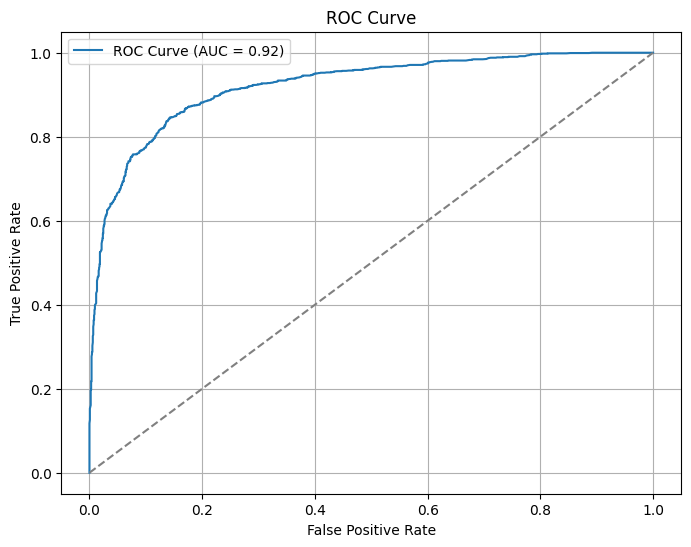

In [ ]:
from sklearn.metrics import  roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# ROC AUC Calculation
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Diagonal line for random chance
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# function to predict whether a molecule is a hERG blocker based on its SMILES
def predict_blocker(smiles_string):
    # create fingerprint given SMILES str
    fingerprint = generate_fingerprints(smiles_string)
    fingerprint_df = pd.DataFrame([fingerprint])
    # use the random forest model from earlier to predict
    prediction = rf_model.predict(fingerprint_df)[0]
    return prediction

# random example i use from the dataset to see if its working
new_smiles = "CC(=O)Oc1ccccc1C(=O)O"
prediction = predict_blocker(new_smiles)
# 1 = blocker, 0 = non-blocker
print(f"Prediction for {new_smiles}: {prediction}")

Prediction for CC(=O)Oc1ccccc1C(=O)O: 0


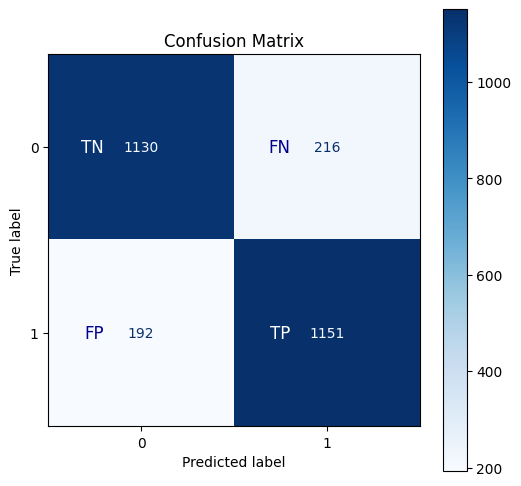

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract individual components of the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Display the confusion matrix with labels
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="Blues", ax=ax)

# Add text annotations for TP, FP, TN, FN
plt.text(-0.2, 0, "TN", ha="right", va="center", color="white", fontsize=12)
plt.text(-0.2, 1, "FP", ha="right", va="center", color="darkblue", fontsize=12)
plt.text(0.8, 0, "FN", ha="right", va="center", color="darkblue", fontsize=12)
plt.text(0.8, 1, "TP", ha="right", va="center", color="white", fontsize=12)


plt.title("Confusion Matrix")
plt.show()


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr}\n")

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1346
           1       0.79      0.80      0.79      1343

    accuracy                           0.79      2689
   macro avg       0.79      0.79      0.79      2689
weighted avg       0.79      0.79      0.79      2689

Accuracy: 0.7939754555596876



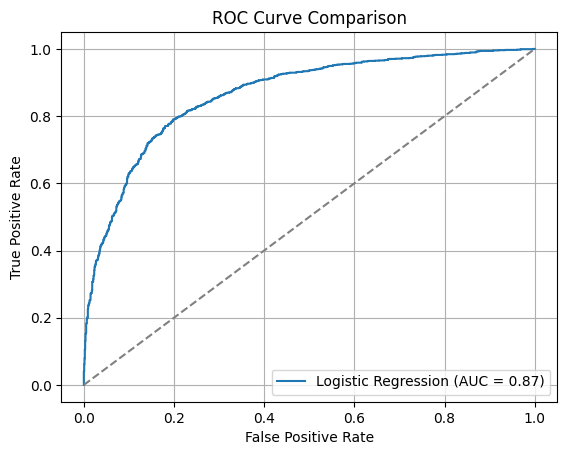

In [ ]:
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

### SVM

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42, kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Support Vector Machine Performance:")
print(classification_report(y_test, y_pred_svm))
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm}\n")

Support Vector Machine Performance:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1346
           1       0.83      0.82      0.82      1343

    accuracy                           0.83      2689
   macro avg       0.83      0.83      0.83      2689
weighted avg       0.83      0.83      0.83      2689

Accuracy: 0.8252138341390851



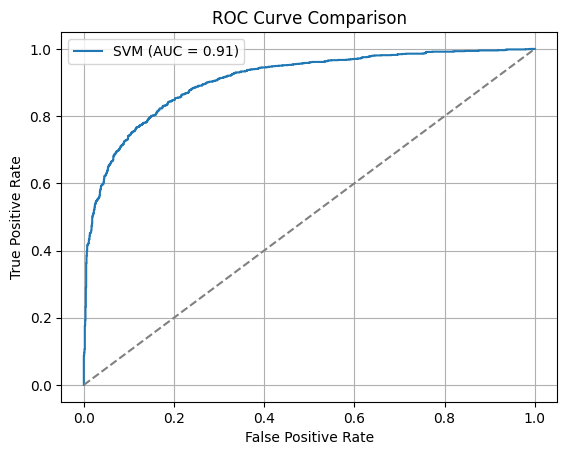

In [ ]:
y_prob_svm = svm_model.decision_function(X_test)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=300, learning_rate=0.01, max_depth=3)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Classifier Performance:")
print(classification_report(y_test, y_pred_gb))
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {accuracy_gb}\n")

NameError: name 'X_train' is not defined

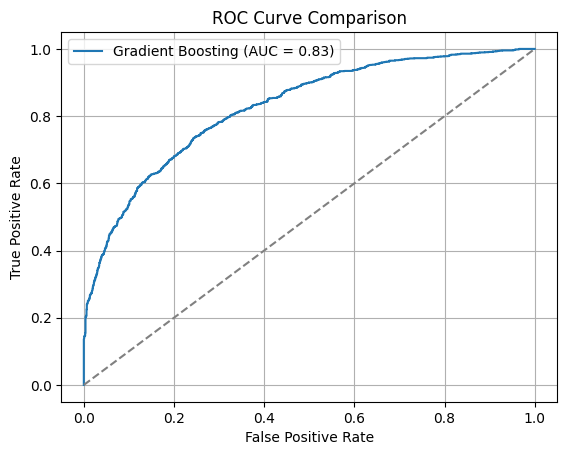

In [ ]:
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_gb:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

### EDA ON DATASET

Total number of data points: 13445
Number of training data points: 9412
Number of testing data points: 2689

Class distribution:
Y
0    6727
1    6718
Name: count, dtype: int64


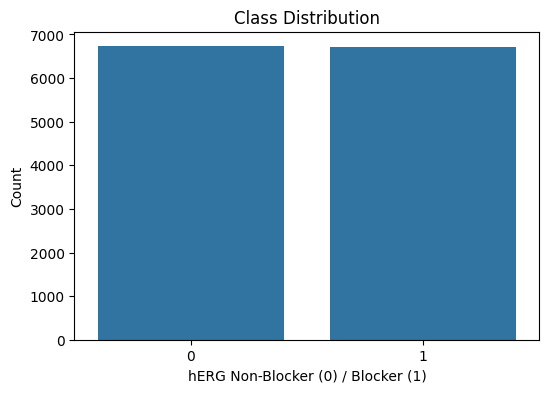

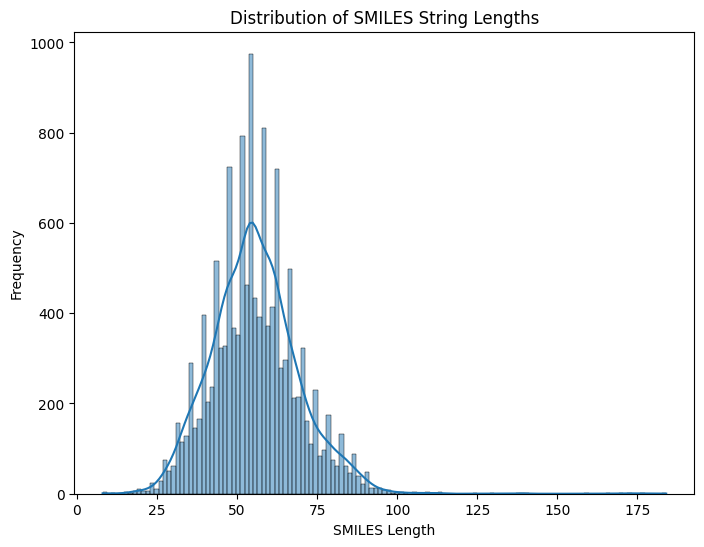

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# combine the test + training + validate dataset for analysis
train_df = cleaned_split['train']
test_df = cleaned_split['test']
valid_df = cleaned_split['valid']
combined_df = pd.concat([train_df, test_df, valid_df], ignore_index=True)

# summary of the dataset
print(f"Total number of data points: {len(combined_df)}")
print(f"Number of training data points: {len(train_df)}")
print(f"Number of testing data points: {len(test_df)}")

# find dist
class_counts = combined_df['Y'].value_counts()
print("\nClass distribution:")
print(class_counts)

#plot to show class distribution of blockers vs nonblockers
plt.figure(figsize=(6, 4))
sns.countplot(x='Y', data=combined_df)
plt.title('Class Distribution')
plt.xlabel('hERG Non-Blocker (0) / Blocker (1)')
plt.ylabel('Count')
plt.show()

# retriving SMILES string lens
combined_df['smiles_length'] = combined_df['Drug'].apply(len)

# dist of SMILES string lens
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['smiles_length'], kde=True)
plt.title('Distribution of SMILES String Lengths')
plt.xlabel('SMILES Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(f"Total number of data points: {len(combined_df)}")
print(f"Number of training data points: {len(train_df)}")
print(f"Number of validation data points: {len(valid_df)}")
print(f"Number of testing data points: {len(test_df)}")

print("\nClass distribution per split:")
for split_name, split_df in cleaned_split.items():
    class_counts = split_df['Y'].value_counts(normalize=True) * 100
    print(f"\nSplit: {split_name}")
    print(class_counts)

Total number of data points: 13445
Number of training data points: 9412
Number of validation data points: 1344
Number of testing data points: 2689

Class distribution per split:

Split: train
Y
1    50.084998
0    49.915002
Name: proportion, dtype: float64

Split: valid
Y
0    50.818452
1    49.181548
Name: proportion, dtype: float64

Split: test
Y
0    50.055783
1    49.944217
Name: proportion, dtype: float64


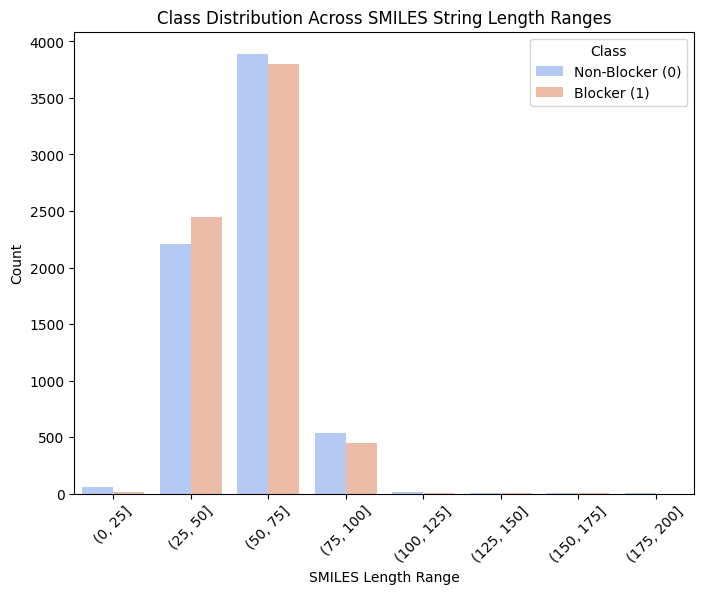

In [ ]:
length_bins = [0, 25, 50, 75, 100, 125, 150, 175, 200]
combined_df['length_bin'] = pd.cut(combined_df['smiles_length'], bins=length_bins)

plt.figure(figsize=(8, 6))
sns.countplot(x='length_bin', hue='Y', data=combined_df, palette='coolwarm')
plt.title('Class Distribution Across SMILES String Length Ranges')
plt.xlabel('SMILES Length Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Class', labels=['Non-Blocker (0)', 'Blocker (1)'])
plt.show()



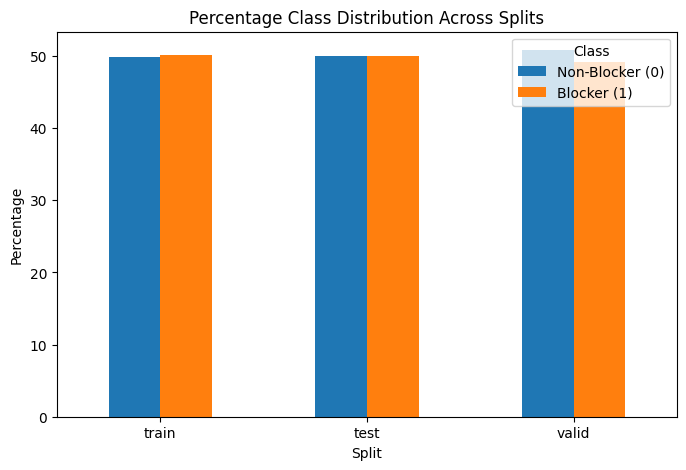

In [ ]:
split_names = ['train', 'test', 'valid']
split_class_distributions = {
    split_name: cleaned_split[split_name]['Y'].value_counts(normalize=True) * 100
    for split_name in split_names
}

split_df = pd.DataFrame(split_class_distributions).T
split_df.plot(kind='bar', figsize=(8, 5))
plt.title('Percentage Class Distribution Across Splits')
plt.xlabel('Split')
plt.ylabel('Percentage')
plt.legend(title='Class', labels=['Non-Blocker (0)', 'Blocker (1)'])
plt.xticks(rotation=0)
plt.show()
